In [27]:
%pylab notebook
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import rasterio
from charistools.modelEnv import ModelEnv
from netCDF4 import Dataset

Populating the interactive namespace from numpy and matplotlib


In [8]:
%cd /projects/brodzik

/projects/brodzik


In [11]:
configFile = "/projects/brodzik/charis_ti_melt/modelEnv_config.ini"
myEnv = ModelEnv(tileConfigFile=configFile, topDir='/projects/brodzik')  

In [70]:
def get_snow_area(drainageID, year, verbose=False):
    ablation_method='grsize_scag'
    threshold='fromFile'
    modice_nstrikes=3
    inputs = myEnv.model_inputs(
        drainageID, 
        year, 
        ablation_method, 
        threshold, 
        modice_nstrikes=modice_nstrikes, 
        verbose=verbose)
    
    all = pd.DataFrame()
    all['SOL'] = inputs["snow_on_land_by_elevation_hyps"].data_by_doy()
    all['EGI'] = inputs["exposed_glacier_ice_by_elevation_hyps"].data_by_doy()
    all['SOI'] = inputs["snow_on_ice_by_elevation_hyps"].data_by_doy()
    
    if verbose:
        print("Read drainageID=%s, year=%d" % (drainageID, year))
    
    return all

In [65]:
def get_snow_for_drainage(drainageID, start_year=2001, stop_year=2015, verbose=False):
    all = pd.DataFrame()
    for year in np.arange(start_year, stop_year):
        next = get_snow_area(drainageID, year, verbose=verbose)
        all = pd.concat([all, next])
        
    return all        

In [67]:
drainageID = "IN_Hunza_at_DainyorBridge"
all = get_snow_for_drainage(drainageID)
all


> charistools.modelEnv: hypsometry_filename is /projects/brodzik/derived_hypsometries/MODSCAG_GF_v09_fromFile/IN_Hunza_at_DainyorBridge/IN_Hunza_at_DainyorBridge.2001.0100m.ERA_Interim_downscale_uncorrected_tsurf.v0.3_by_elev.txt; file_exists=True
> charistools.modelEnv: hypsometry_filename is /projects/brodzik/derived_hypsometries/MODSCAG_GF_v09_fromFile/IN_Hunza_at_DainyorBridge/IN_Hunza_at_DainyorBridge.2001.0100m.modicev04_3strike.snow_on_land_area_by_elev.txt; file_exists=True
> charistools.modelEnv: hypsometry_filename is /projects/brodzik/derived_hypsometries/MODSCAG_GF_v09_fromFile/IN_Hunza_at_DainyorBridge/IN_Hunza_at_DainyorBridge.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.snow_on_ice_area_by_elev.txt; file_exists=True
> charistools.modelEnv: hypsometry_filename is /projects/brodzik/derived_hypsometries/MODSCAG_GF_v09_fromFile/IN_Hunza_at_DainyorBridge/IN_Hunza_at_DainyorBridge.2001.0100m.modicev04_3strike.GRSIZE_SCAG.fromFile.exposed_glacier_ice_area_by_elev.txt; file

,SOL,EGI,SOI
Date,,,
2001-01-01,4139.81,201.74,3652.81
2001-01-02,4050.46,160.98,3632.76
2001-01-03,3995.66,140.76,3631.22
2001-01-04,3997.52,122.95,3681.93
2001-01-05,4023.98,116.00,3748.70
2001-01-06,4076.80,119.77,3828.44
2001-01-07,4136.70,135.00,3895.28
2001-01-08,4163.98,149.42,3925.99
2001-01-09,4150.95,168.68,3909.09


In [69]:
14 * 365.24

5113.360000000001

<IPython.core.display.Javascript object>


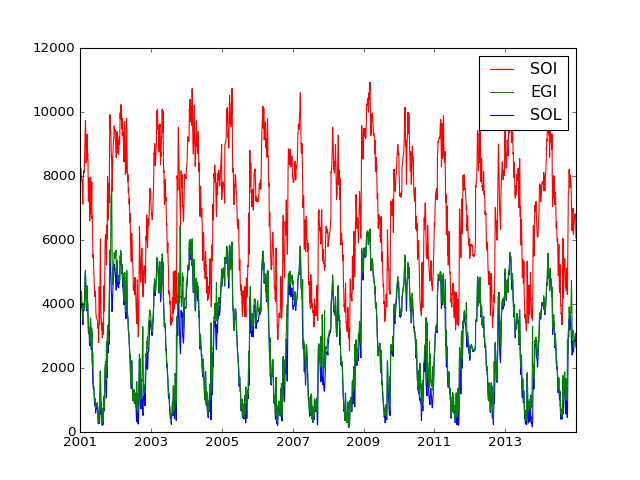

In [68]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(all['SOL'], label='SOL')
ax.plot(all['SOL'] + all['EGI'], label='EGI')
ax.plot(all['SOL'] + all['EGI'] + all['SOI'], label='SOI')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1])


In [71]:
drainageID = "IN_v01_OBJECTID0"
all0 = get_snow_for_drainage(drainageID)
all0

,SOL,EGI,SOI
Date,,,
2001-01-01,8661.90,123.36,6718.97
2001-01-02,8632.59,95.51,6743.13
2001-01-03,8634.44,84.72,6810.69
2001-01-04,8667.45,75.70,6922.59
2001-01-05,8678.27,74.54,6975.85
2001-01-06,8673.49,66.57,6983.34
2001-01-07,8677.24,65.19,6961.95
2001-01-08,8641.02,56.65,6926.58
2001-01-09,8532.39,54.80,6865.88


In [42]:
all['SOL'] = sol
all['EGI'] = egi
all['SOI'] = soi
all

,SOL,EGI,SOI
Date,,,
2001-01-01,4139.81,201.74,3652.81
2001-01-02,4050.46,160.98,3632.76
2001-01-03,3995.66,140.76,3631.22
2001-01-04,3997.52,122.95,3681.93
2001-01-05,4023.98,116.00,3748.70
2001-01-06,4076.80,119.77,3828.44
2001-01-07,4136.70,135.00,3895.28
2001-01-08,4163.98,149.42,3925.99
2001-01-09,4150.95,168.68,3909.09


<IPython.core.display.Javascript object>


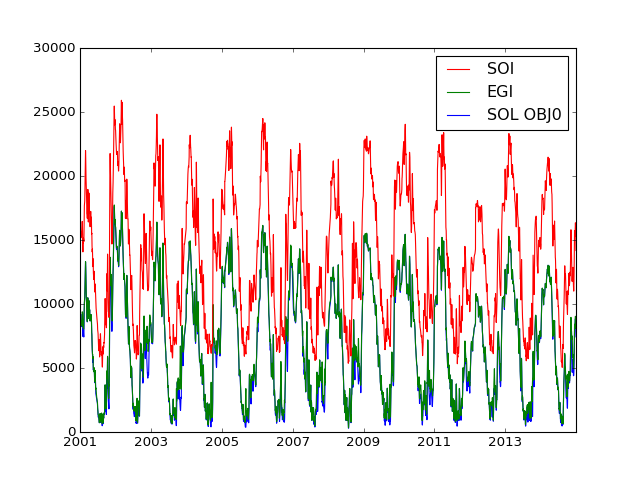

In [72]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(all0['SOL'], label='SOL OBJ0')
ax.plot(all0['SOL'] + all0['EGI'], label='EGI')
ax.plot(all0['SOL'] + all0['EGI'] + all0['SOI'], label='SOI')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1])


In [ ]:
mod10 = mod10_cube.read(1)
print(mod10.shape)
np.amin(mod10), np.amax(mod10)

In [ ]:
f = Dataset(mod10a1_filename, 'r', 'HDF5')
d = f.groups['500m'].variables['fsca']

In [ ]:
d

In [ ]:
forig = Dataset(modscag_filename, 'r', 'HDF5')
dorig = forig.groups['500m'].variables['fsca']
dorig